# Import all necessary libraries

In [407]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [383]:
location = Location(latitude=51.49485285582177, longitude=10.798237375098022, 
                    tz='Europe/Berlin', altitude=80, name = 'Hallesche Straße 13')

In [384]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

In [385]:
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [386]:
temperature_parameteres=TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [387]:
system = PVSystem(surface_tilt=45, surface_azimuth=180, 
                  module_parameters=module, inverter_parameters=inverter, 
                  temperature_model_parameters=temperature_parameteres)

In [388]:
modelchain = ModelChain(system, location)

In [389]:
time = pd.date_range(start='3/27/2023', end='4/02/2023', freq='1min', tz=location.tz)

In [390]:
clear_sky = location.get_clearsky(time)

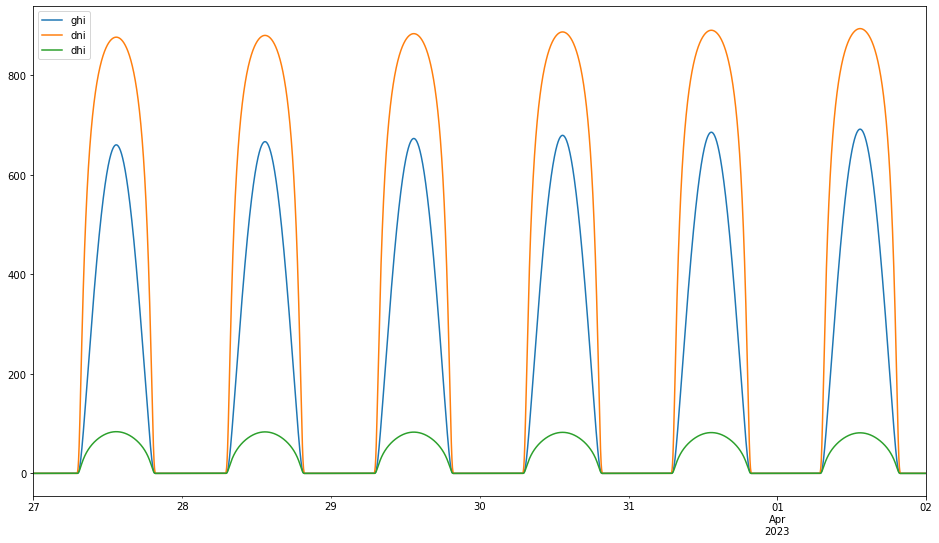

In [391]:
clear_sky.plot(figsize=(16,9))
plt.show()

# PV GIS

In [13]:
tmy = pd.read_csv(r'C:\Users\dharm\OneDrive\Desktop\pvgis\PVGIS_Halleschestraße13.csv', skiprows=16, nrows=8760,
                  usecols=["time(UTC)", "T2m", "G(h)", "Gb(n)", "Gd(h)", "WS10m"], index_col=0)
tmy

,T2m,G(h),Gb(n),Gd(h),WS10m
time(UTC),,,,,
20060101:0000,3.09,0.0,-0.0,0.0,3.99
20060101:0100,2.84,0.0,-0.0,0.0,3.71
20060101:0200,2.60,0.0,-0.0,0.0,3.44
20060101:0300,2.35,0.0,-0.0,0.0,3.16
20060101:0400,2.10,0.0,-0.0,0.0,2.88
...,...,...,...,...,...
20121231:1900,4.33,0.0,-0.0,0.0,5.37
20121231:2000,4.08,0.0,-0.0,0.0,5.09
20121231:2100,3.83,0.0,-0.0,0.0,4.81


In [14]:
tmy.index=pd.date_range(start = "2023-01-01 00:00", end="2023-12-31 23:00", freq="h")
tmy.columns = ["temp_air", "ghi", "dni", "dhi", "wind_speed"]

In [15]:
tmy.columns = ["temp_air", "ghi", "dni", "dhi", "wind_speed"]

                     temp_air  ghi  dni  dhi  wind_speed
2023-01-01 00:00:00      3.09  0.0 -0.0  0.0        3.99
2023-01-01 01:00:00      2.84  0.0 -0.0  0.0        3.71
2023-01-01 02:00:00      2.60  0.0 -0.0  0.0        3.44
2023-01-01 03:00:00      2.35  0.0 -0.0  0.0        3.16
2023-01-01 04:00:00      2.10  0.0 -0.0  0.0        2.88
...                       ...  ...  ...  ...         ...
2023-12-31 19:00:00      4.33  0.0 -0.0  0.0        5.37
2023-12-31 20:00:00      4.08  0.0 -0.0  0.0        5.09
2023-12-31 21:00:00      3.83  0.0 -0.0  0.0        4.81
2023-12-31 22:00:00      3.59  0.0 -0.0  0.0        4.54
2023-12-31 23:00:00      3.34  0.0 -0.0  0.0        4.26

[8760 rows x 5 columns]


<AxesSubplot:>

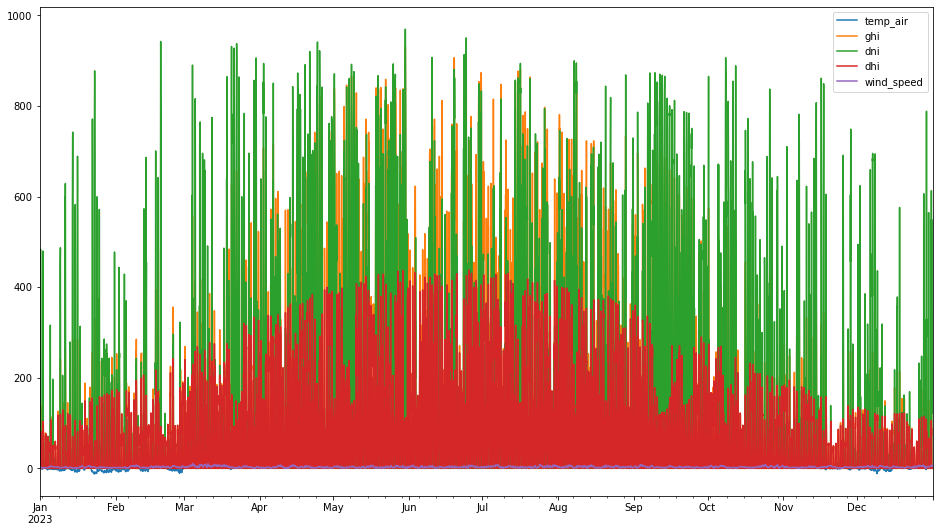

In [16]:
print(tmy)
tmy.plot(figsize=(16,9))

# POA

In [17]:
global_2020 = pd.read_csv(r"C:\Users\dharm\OneDrive\Desktop\pvgis\pvgis_global_45.csv", 
                          skiprows=8, nrows=8784, index_col=0)

In [18]:
print(global_2020)

               G(i)  H_sun   T2m  WS10m  Int
time                                        
20200101:0010   0.0    0.0  0.52   1.86  0.0
20200101:0110   0.0    0.0  0.11   1.86  0.0
20200101:0210   0.0    0.0 -0.19   1.66  0.0
20200101:0310   0.0    0.0 -0.60   1.59  0.0
20200101:0410   0.0    0.0 -1.00   1.45  0.0
...             ...    ...   ...    ...  ...
20201231:1910   0.0    0.0  0.63   1.38  0.0
20201231:2010   0.0    0.0  0.61   1.10  0.0
20201231:2110   0.0    0.0  0.57   0.90  0.0
20201231:2210   0.0    0.0  0.29   0.90  0.0
20201231:2310   0.0    0.0  0.11   0.83  0.0

[8784 rows x 5 columns]


In [19]:
components_2020 = pd.read_csv(r"C:\Users\dharm\OneDrive\Desktop\pvgis\pvgis_components_45.csv", skiprows=8, nrows=8784, index_col=0)

In [20]:
print(components_2020)

               Gb(i)  Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int
time                                                       
20200101:0010    0.0    0.0    0.0    0.0  0.52   1.86  0.0
20200101:0110    0.0    0.0    0.0    0.0  0.11   1.86  0.0
20200101:0210    0.0    0.0    0.0    0.0 -0.19   1.66  0.0
20200101:0310    0.0    0.0    0.0    0.0 -0.60   1.59  0.0
20200101:0410    0.0    0.0    0.0    0.0 -1.00   1.45  0.0
...              ...    ...    ...    ...   ...    ...  ...
20201231:1910    0.0    0.0    0.0    0.0  0.63   1.38  0.0
20201231:2010    0.0    0.0    0.0    0.0  0.61   1.10  0.0
20201231:2110    0.0    0.0    0.0    0.0  0.57   0.90  0.0
20201231:2210    0.0    0.0    0.0    0.0  0.29   0.90  0.0
20201231:2310    0.0    0.0    0.0    0.0  0.11   0.83  0.0

[8784 rows x 7 columns]


In [21]:
poa_data_2020 = pd.DataFrame(columns= ['poa_global', 'poa_direct', 'poa_diffuse', 
    'temp_air', 'wind_speed'], index = global_2020.index)

In [22]:
poa_data_2020['poa_global'] = global_2020['G(i)']
poa_data_2020['poa_direct'] = components_2020['Gb(i)']
poa_data_2020['poa_diffuse'] = components_2020['Gb(i)'] + components_2020['Gr(i)']
poa_data_2020['temp_air'] = components_2020['T2m']
poa_data_2020['wind_speed'] = components_2020['WS10m']

In [23]:
poa_data_2020.index = pd.to_datetime(poa_data_2020.index, format = "%Y%m%d:%H%M")
print(poa_data_2020)

                     poa_global  poa_direct  poa_diffuse  temp_air  wind_speed
time                                                                          
2020-01-01 00:10:00         0.0         0.0          0.0      0.52        1.86
2020-01-01 01:10:00         0.0         0.0          0.0      0.11        1.86
2020-01-01 02:10:00         0.0         0.0          0.0     -0.19        1.66
2020-01-01 03:10:00         0.0         0.0          0.0     -0.60        1.59
2020-01-01 04:10:00         0.0         0.0          0.0     -1.00        1.45
...                         ...         ...          ...       ...         ...
2020-12-31 19:10:00         0.0         0.0          0.0      0.63        1.38
2020-12-31 20:10:00         0.0         0.0          0.0      0.61        1.10
2020-12-31 21:10:00         0.0         0.0          0.0      0.57        0.90
2020-12-31 22:10:00         0.0         0.0          0.0      0.29        0.90
2020-12-31 23:10:00         0.0         0.0         

In [24]:
poa_data_2020.to_csv("poa_data_2020.csv")

In [25]:
poa_data_2020 = pd.read_csv("poa_data_2020.csv", index_col=0)

In [26]:
poa_data_2020.index = pd.to_datetime((poa_data_2020.index))

In [27]:
modelchain.run_model_from_poa(poa_data_2020)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

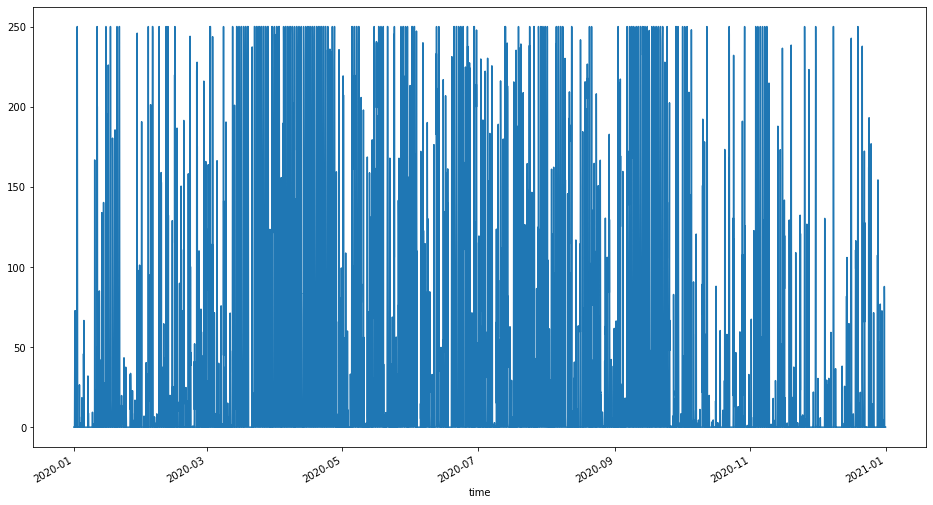

In [28]:
modelchain.results.ac.plot(figsize = (16,9))
plt.show()

In [29]:
modelchain1 = ModelChain(system,location)

<AxesSubplot:xlabel='time'>

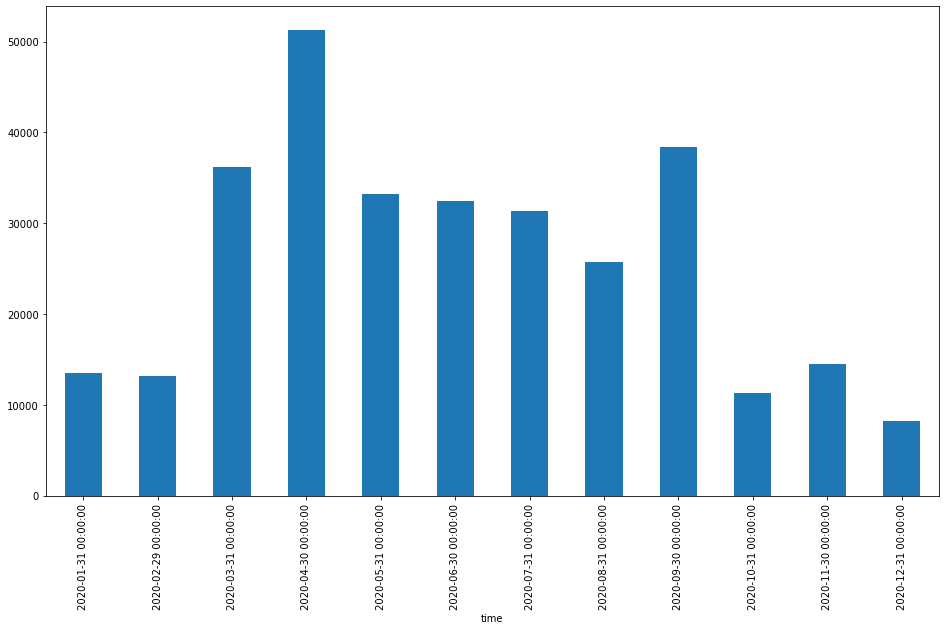

In [30]:
modelchain1.run_model_from_poa(poa_data_2020)
modelchain1.results.ac.resample('M').sum().plot(kind='bar',figsize=(16,9))

# IO Tools

In [31]:
poa_data_2020,meta,inputs = pvlib.iotools.get_pvgis_hourly(latitude=51.49485285582177,
                                                        longitude=10.798237375098022, start=2020, 
                                                        end=2020, raddatabase='PVGIS-SARAH2', 
                                                        components=True, surface_tilt=45, 
                                                        surface_azimuth=0, outputformat='json', 
                                                        usehorizon=True, userhorizon=None, 
                                                        pvcalculation=False, peakpower=None, 
                                                        pvtechchoice='crystSi', mountingplace='free', 
                                                        loss=0, trackingtype=0, 
                                                        optimal_surface_tilt=False, optimalangles=False,
                                                        url='https://re.jrc.ec.europa.eu/api/v5_2/', 
                                                        map_variables=True, timeout=30)


In [32]:
poa_data_2020['poa_diffuse'] = poa_data_2020['poa_sky_diffuse'] + poa_data_2020['poa_ground_diffuse']
poa_data_2020['poa_global'] = poa_data_2020['poa_diffuse'] + poa_data_2020['poa_direct']

In [33]:
print(poa_data_2020)

                           poa_direct  poa_sky_diffuse  poa_ground_diffuse  \
time                                                                         
2020-01-01 00:10:00+00:00         0.0              0.0                 0.0   
2020-01-01 01:10:00+00:00         0.0              0.0                 0.0   
2020-01-01 02:10:00+00:00         0.0              0.0                 0.0   
2020-01-01 03:10:00+00:00         0.0              0.0                 0.0   
2020-01-01 04:10:00+00:00         0.0              0.0                 0.0   
...                               ...              ...                 ...   
2020-12-31 19:10:00+00:00         0.0              0.0                 0.0   
2020-12-31 20:10:00+00:00         0.0              0.0                 0.0   
2020-12-31 21:10:00+00:00         0.0              0.0                 0.0   
2020-12-31 22:10:00+00:00         0.0              0.0                 0.0   
2020-12-31 23:10:00+00:00         0.0              0.0          

In [34]:
poa_data_2020.to_csv("poa_data_2020_io.csv")

In [35]:
poa_data_2020 = pd.read_csv("poa_data_2020.csv", index_col=0)

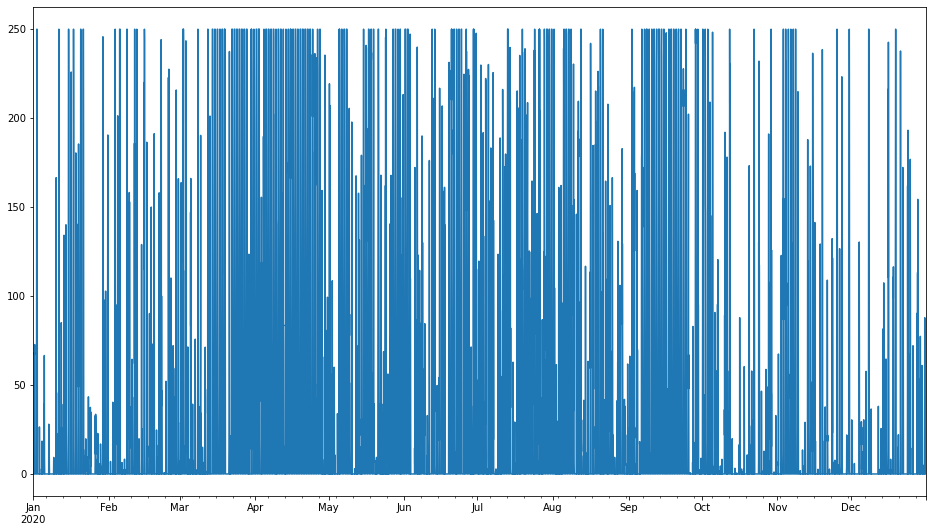

In [98]:
poa_data_2020.index = pd.to_datetime((poa_data_2020.index))
modelchain.run_model_from_poa(poa_data_2020)
modelchain.results.ac.plot(figsize = (16,9))
plt.show()

# Spec sheet data

In [213]:
celltype = 'monoSi'
pdc0 = 400
v_mp =44.1
i_mp = 9.08
v_oc = 53.4
i_sc = 9.60
alpha_sc = 0.0005 * i_sc
beta_voc = -0.0029 * v_oc
gamma_pdc = -0.0037
cells_in_series = 6 * 27
temp_ref = 25

In [214]:
location = Location(latitude=51.49485285582177, longitude=10.798237375098022, 
                    tz='Europe/Berlin', altitude=80, name = 'Hallesche Straße 13')

In [215]:
surface_tilt = 45
surface_azimuth = 180
start = "2020-07-01 00:00"
end="2020-07-07 23:00"

In [216]:
poa_data_2020 = pd.read_csv("poa_data_2020.csv", index_col=0)


In [217]:
poa_data_2020.index = pd.date_range(start="2020-01-01 00:00", periods = len(poa_data_2020.index),
                             freq='h')
poa_data = poa_data_2020[start:end]

In [218]:
solarpos = location.get_solarposition(times=pd.date_range(start=start, end=end, freq="h"))

In [219]:
aoi = pvlib.irradiance.aoi(surface_tilt, surface_azimuth, solarpos.apparent_zenith, solarpos.azimuth)

In [220]:
iam = pvlib.iam.ashrae(aoi)

In [221]:
effective_irradiance = poa_data["poa_direct"] * iam + poa_data["poa_diffuse"]

In [222]:
temp_cell = pvlib.temperature.faiman(poa_data["poa_global"], poa_data["temp_air"], 
                                    poa_data["wind_speed"])

In [223]:
result_dc = pvlib.pvsystem.pvwatts_dc(effective_irradiance, temp_cell, 
                                      pdc0, gamma_pdc=gamma_pdc, temp_ref = 25)

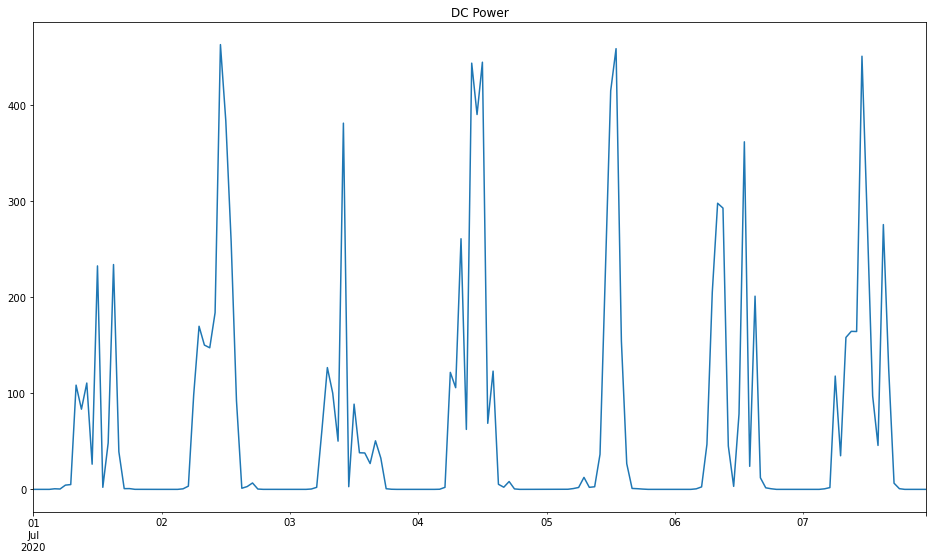

In [224]:
result_dc.plot(figsize=(16,9))
plt.title("DC Power")
plt.show()

In [225]:
results_ac =pvlib.inverter.pvwatts(pdc=result_dc, pdc0 = 200, eta_inv_nom=0.961,
                                  eta_inv_ref=0.9637)

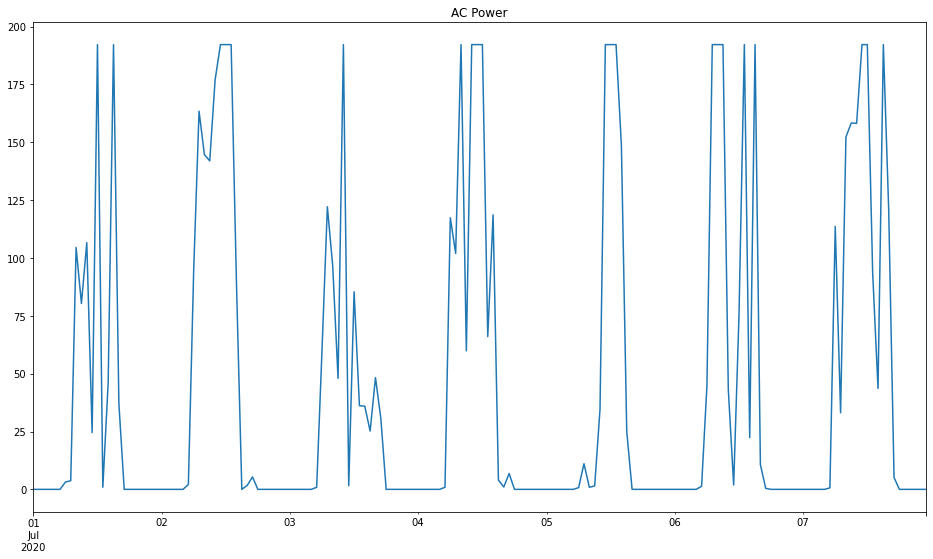

In [226]:
results_ac.plot(figsize=(16,9))
plt.title("AC Power")
plt.show()

# MPP

In [239]:
celltype = 'monoSi'
pdc0 = 400
v_mp =44.1
i_mp = 9.08
v_oc = 53.4
i_sc = 9.60
alpha_sc = 0.0005 * i_sc
beta_voc = -0.0029 * v_oc
gamma_pdc = -0.37
cells_in_series = 6 * 27
temp_ref = 25
I_L_ref,I_o_ref,R_s,R_sh_ref,a_ref,Adjust = pvlib.ivtools.sdm.fit_cec_sam(celltype = celltype, 
                                  v_mp = v_mp, i_mp = i_mp, v_oc = v_oc, i_sc = i_sc,
                                  alpha_sc = alpha_sc, beta_voc = beta_voc, gamma_pmp = gamma_pdc, 
                                  cells_in_series = cells_in_series, temp_ref = temp_ref)

In [240]:
cec_params = pvlib.pvsystem.calcparams_cec(effective_irradiance,
                             temp_cell, alpha_sc, a_ref, I_L_ref, I_o_ref, R_sh_ref, R_s, Adjust)

In [241]:
mpp = pvlib.pvsystem.max_power_point(*cec_params, method = 'newton')
print(mpp)

                        i_mp      v_mp      p_mp
2020-07-01 00:00:00  0.00000   0.00000  0.000000
2020-07-01 01:00:00  0.00000   0.00000  0.000000
2020-07-01 02:00:00  0.00000   0.00000  0.000000
2020-07-01 03:00:00  0.00000   0.00000  0.000000
2020-07-01 04:00:00  0.01316  35.73167  0.470225
...                      ...       ...       ...
2020-07-07 19:00:00  0.00000   0.00000  0.000000
2020-07-07 20:00:00  0.00000   0.00000  0.000000
2020-07-07 21:00:00  0.00000   0.00000  0.000000
2020-07-07 22:00:00  0.00000   0.00000  0.000000
2020-07-07 23:00:00  0.00000   0.00000  0.000000

[168 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

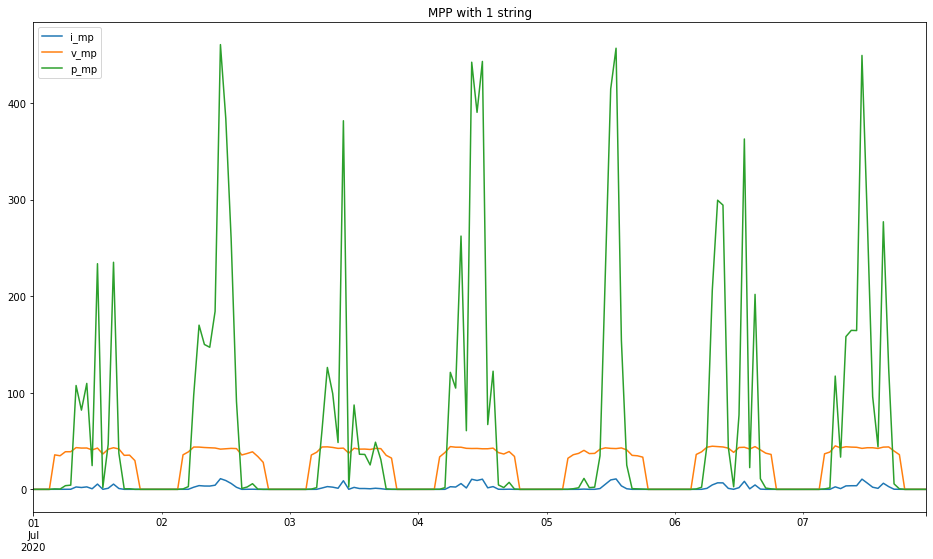

In [242]:
mpp.plot(figsize=(16,9))
plt.title("MPP with 1 string")
plt.show

In [243]:
system = PVSystem(modules_per_string = 5, strings_per_inverter = 1)
dc_scaled = system.scale_voltage_current_power(mpp)

<function matplotlib.pyplot.show(close=None, block=None)>

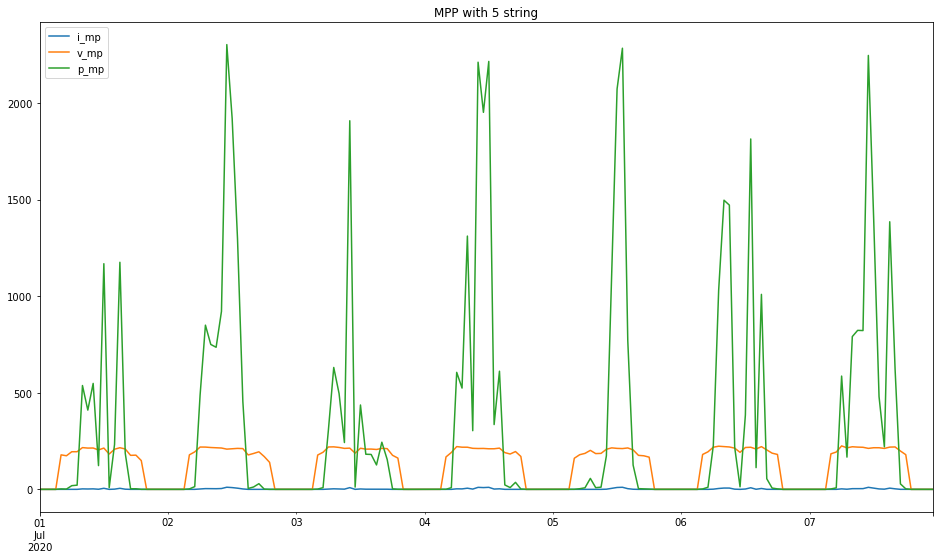

In [244]:
dc_scaled.plot(figsize=(16,9))
plt.title("MPP with 5 string")
plt.show

In [245]:
ac_results = pvlib.inverter.sandia(v_dc=dc_scaled.v_mp, p_dc=dc_scaled.p_mp, inverter=inverter)

<function matplotlib.pyplot.show(close=None, block=None)>

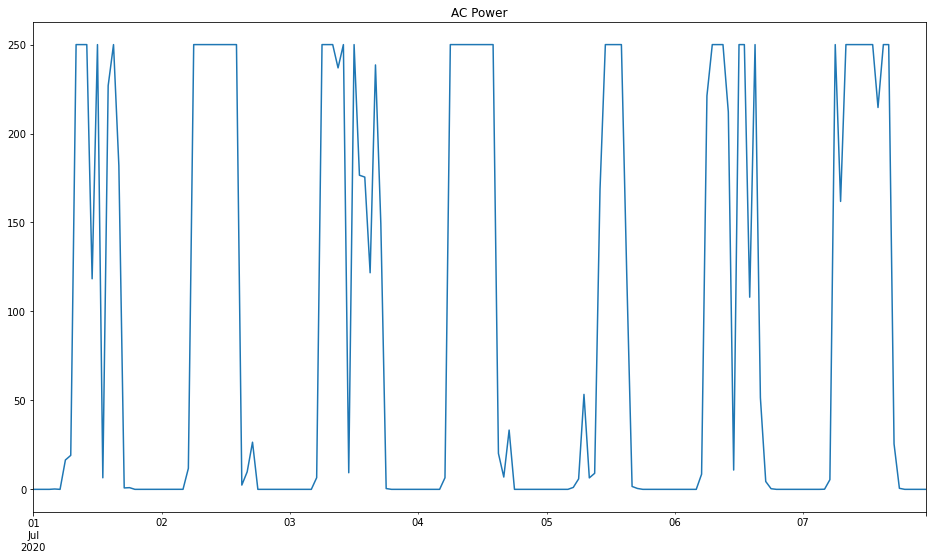

In [246]:
ac_results.plot(figsize=(16,9))
plt.title("AC Power")
plt.show

# Single axis reacking

<AxesSubplot:title={'center':'Single axis tracker orientation'}>

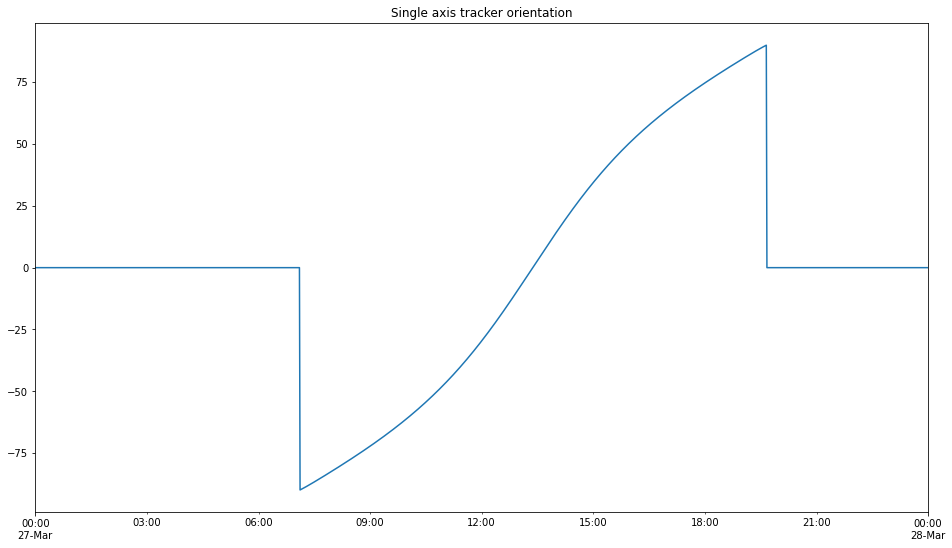

In [358]:
from pvlib.pvsystem import PVSystem, Array, SingleAxisTrackerMount
modules_per_string = 4
strings_per_inverter = 1
mount = SingleAxisTrackerMount(axis_tilt=0, axis_azimuth=180, max_angle=90, backtrack=False)
time = pd.date_range(start='3/27/2023', end='3/28/2023', freq='1min', tz=location.tz)
sol_pos = location.get_solarposition(time)
orientation = mount.get_orientation(solar_zenith=sol_pos['apparent_zenith'], 
                                    solar_azimuth=sol_pos['azimuth'] )
orientation['tracker_theta'].fillna(0).plot(title='Single axis tracker orientation', figsize=(16,9))


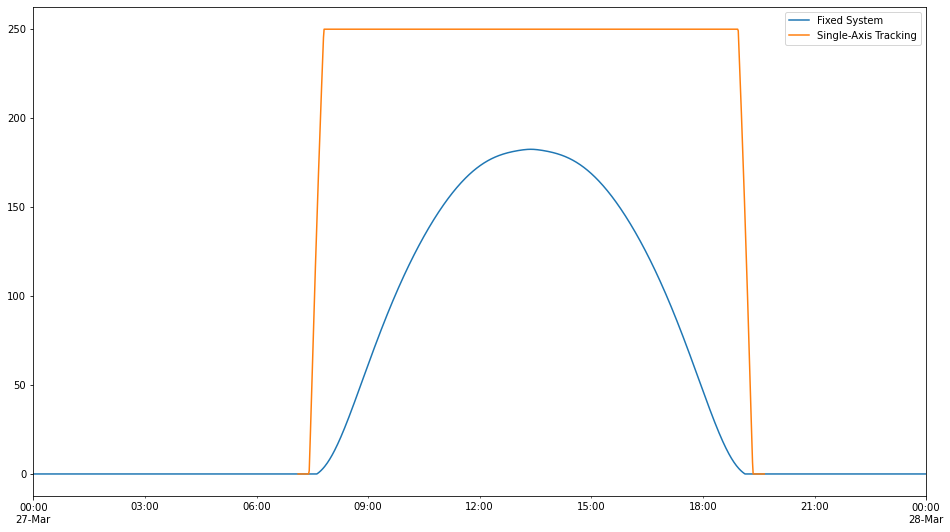

In [356]:
array = Array(mount=mount, module_parameters = module, 
              temperature_model_parameters=temperature_parameteres,
              modules_per_string = modules_per_string, strings=strings_per_inverter)
system_sat = PVSystem(arrays=[array], inverter_parameters = inverter)
modelchain_sat = ModelChain(system_sat, location)
time = pd.date_range(start='3/27/2023', end='3/28/2023', freq='1min', tz=location.tz)
clear_sky = location.get_clearsky(time)
modelchain_sat.run_model(clear_sky)
modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
modelchain_sat.results.ac.plot(figsize=(16,9))
plt.legend(['Fixed System', 'Single-Axis Tracking'])
plt.show()

# Duel Axis Tracking

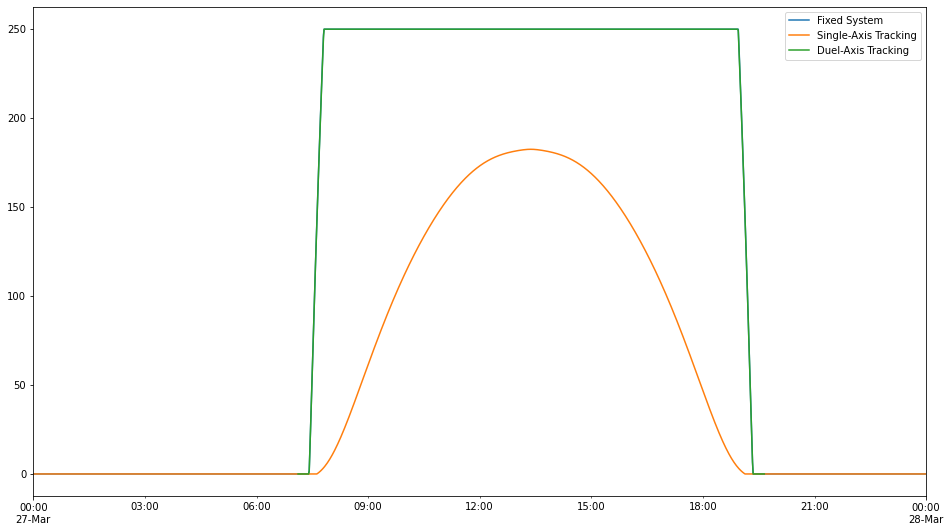

In [378]:
from pvlib.pvsystem import PVSystem, Array, SingleAxisTrackerMount, AbstractMount
class DuelAxisTrackerMount(AbstractMount):
    def get_orientation(self, solar_zenith, solar_azimuth):
        return{'surface_tilt':solar_zenith, 'surface_azimuth':solar_azimuth}
    
mount_dat = DuelAxisTrackerMount()
array_dat = Array(mount=mount_dat, module_parameters = module, 
              temperature_model_parameters=temperature_parameteres,
              modules_per_string = modules_per_string, strings=strings_per_inverter)

system_dat = PVSystem(arrays=[array_dat], inverter_parameters = inverter)

modelchain_dat = ModelChain(system_dat, location)

modelchain.run_model(clear_sky)
modelchain_sat.run_model(clear_sky)
modelchain_dat.run_model(clear_sky)

modelchain_dat.results.ac.plot(figsize=(16,9))
modelchain.results.ac.plot(figsize=(16,9))
modelchain_sat.results.ac.plot(figsize=(16,9))

plt.legend(['Fixed System', 'Single-Axis Tracking', 'Duel-Axis Tracking'])
plt.show()

# East-West orientation

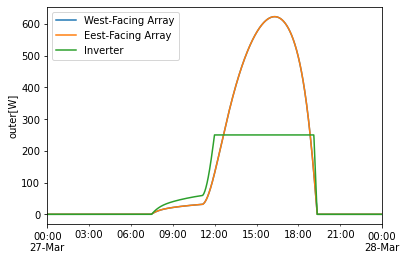

In [406]:
from pvlib.pvsystem import PVSystem, Array, FixedMount

arrays = [Array(FixedMount(surface_tilt = 45, surface_azimuth=270), name='West-Facing Array', 
                module_parameters= module, temperature_model_parameters=temperature_parameteres,
                modules_per_string = modules_per_string, strings=strings_per_inverter),
         Array(FixedMount(surface_tilt = 45, surface_azimuth=270), name='Eest-Facing Array',
               module_parameters= module, temperature_model_parameters=temperature_parameteres,
                modules_per_string = modules_per_string, strings=strings_per_inverter)]

modelchain = ModelChain(system,location)

time = pd.date_range(start='3/27/2023', end='3/28/2023', freq='1min', tz=location.tz)
clear_sky = location.get_clearsky(time)

modelchain.run_model(clear_sky)

fig, ax = plt.subplots()

modelchain.results.dc[0].p_mp.plot(label=system.arrays[0].name, ax=ax)
modelchain.results.dc[1].p_mp.plot(label=system.arrays[1].name, ax=ax)
modelchain.results.ac.plot(label='Inverter', ax=ax)
plt.ylabel('outer[W]')
plt.legend()
plt.show()


'C:\\Users\\dharm'